<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# **Loading Images in Keras**


Estimated time needed: **45** minutes


<h1> CNN Training Pipeline </h1></s>


Convolutional neural networks (CNNs) have had great success in certain kinds of problems, such as image recognition. Data loading and preparation are important steps when it comes to working with such models. Increasingly, data augmentation is also required for more complex object recognition tasks. In this lab, we will discover various ways of loading images, as well as converting, augmenting and saving image datasets using the Keras API.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/images/cnn_image_loading_lab.drawio.png)


### What's a Digital Image?


A gray-scale digital image can be interpreted as a rectangular array of numbers. If we zoom into the region, we see the image is comprised of a rectangular grid of discrete blocks called pixels. We can represent these pixels with numbers called intensity values ranging from 0 to 255, as shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/Gray_scale_lana.png)


Color images are a combination of red, blue, and green intensity values as shown here


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/RGB_ape.png)


each channel has  values ranging from 0 to 255.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/RGB_array.png)


Finally, to apply a neural network to Karis we sometimes add a batch dimension, this is just  an extra dimension. Just think of the batch dimension as an address that contains an image array.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/batch_dim_images.png)


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
    </li>
    <li><a href="https://#Background">Objectives</a></li>
    <li>
        <a href="https://#Ways to load images">Ways to load images</a>
        <ol>
            <li><a href="https://#Ready-to-use toy datasets">Ready-to-use toy datasets</a></li>
            <li><a href="https://#Load individual images as PIL objects">Load individual images as PIL objects</a></li>
            <li><a href="https://#Load from directory of images">Load from directory of images</a></li>
            <li><a href="https://#Load image from URL">Load image from URL</a></li>
        </ol>
    </li>
</ol>


<h1 href="Objectives">Objectives</h1>

After completing this lab you will be able to **apply** Keras to:

*   Load and display images in multiple ways
*   Convert between array and PIL formats
*   Convert images to grayscale, augment images through transformations and save images to files


In [1]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass


import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # tensorflow INFO and WARNING messages are not printed 

In [2]:
import random 

import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import PIL
import PIL.Image
from PIL import Image, ImageOps
import tensorflow as tf
import keras
from keras.preprocessing import image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img 
from keras.models import Model
from keras.layers import Input, Dense

import cv2

sns.set_context('notebook')
sns.set_style('white')

### Defining Helper Functions


In [3]:
# This function will allow us to visualize four sample images from the loaded toy image dataset. 
def visualize(X, y):
    plt.rcParams['figure.figsize'] = (6,6) 

    for i in range(4):
        plt.subplot(2, 2, i + 1)
        num = random.randint(0, len(X))
        plt.imshow(X[num], cmap='gray', interpolation='none', vmin=0, vmax=255)
        plt.title(f"Class: {y[num]}")
    
    plt.tight_layout()

## Background


Keras is an open-source Python library used for developing and evaluating deep learning models. It provides utilities for loading, preparing, converting, augmenting, and saving image data. In this lab, we will explore various ways of loading image datasets in Keras.


In [5]:
print(tf.__version__)

2.16.1


## Ways to load images


We will look into four main ways of using image datasets in Keras:

*   Loading in a ready-to-use toy dataset from [Keras](https://keras.io/api/datasets/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)
*   Loading individual images as PIL objects
*   Reading a directory of images on disk using `tf.keras.utils.image_dataset_from_directory`.
*   Loading image from URL


### A. Ready-to-use toy datasets


The `tf.keras.datasets` in Keras provide a few in-built image datasets that have been cleaned and are typically helpful in debugging models, or creating simple examples.

These include MNIST hand-written digits, Fashion MNIST, CIFAR10, and CIFAR100.


**MNIST hand-written digits** is a collection of 60,000 28x28 grayscale images belonging to 10 different classes, along with a test set of 10,000 images. Let us load in the MNIST hand-written digits dataset using the `load_data` function.


In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train is a uint8 numpy array of grayscale images with shapes (60000, 28, 28) from the training dataset. Its pixel values range from 0 to 255.

y_train is a uint8 numpy array of digit labels (integers in range 0-9) with shape (60000) for the training data.


In [7]:
print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)
print(y_train.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8


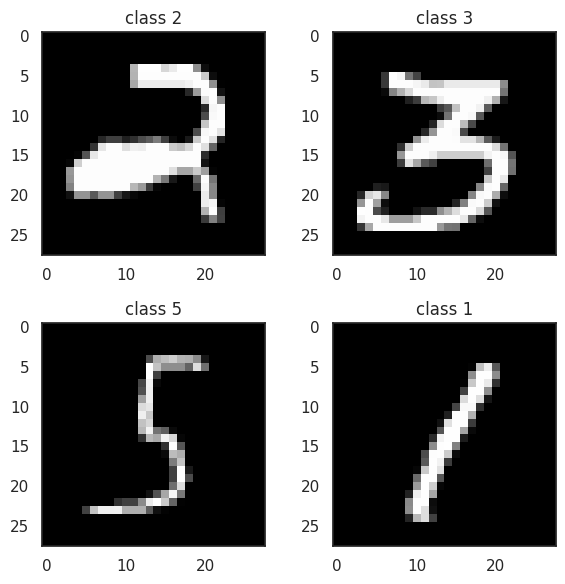

In [8]:
visualize(X_train, y_train)

#### Using image data with Autoencoders


As you will see in future labs, an autoencoder (AE) is a neural network where the input is the same as the output.  

To build an AE, you need three things:

* an encoding function
* a decoding function
* distance function between the amount of information loss between the compressed representation of your data and the decompressed representation, that is, a loss function

Some practical applications of AEs are data denoising and dimensionality reduction for data visualization.



We can define a size for our encoded representations, and use `Dense()` to create encoded representation of the input. Similarly, we can use `Dense()` to create lossy reconstructions of the input. As seen below, `encoded` has a shape of (None, 64) and `reconstruction` has the original input size of (None, 784).


In [9]:
ENCODING_DIM = 64

inputs = Input(shape=(784,))
encoded = Dense(ENCODING_DIM, activation='sigmoid')(inputs)

In [10]:
encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
reconstruction = Dense(784, activation='sigmoid')(encoded_inputs)

In [11]:
print(f"Encoded Input: {encoded.shape}")
print(f"Reconstructed Input: {reconstruction.shape}")

Encoded Input: (None, 64)
Reconstructed Input: (None, 784)


Using this technique, we can instantiate three types of models:

* End-to-end AEs mapping inputs to reconstructions
* An encoder mapping inputs to the latent space
* A decoder that takes in points from latent space and output corresponding reconstructed samples


### Exercise 1 - Load Fashion MNIST


**Fashion MNIST** is another collection of 60,000 28x28 grayscale images belonging to 10 different classes, along with a test set of 10,000 images. Write code to load the Fashion MNIST dataset using  `fashion_mnist.load_data()` from `keras.datasets`.


In [13]:
(X_train2, y_train2), (X_test2, y_train2) = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
X_train2.shape

(60000, 28, 28)

In [15]:
X_train2.dtype

dtype('uint8')

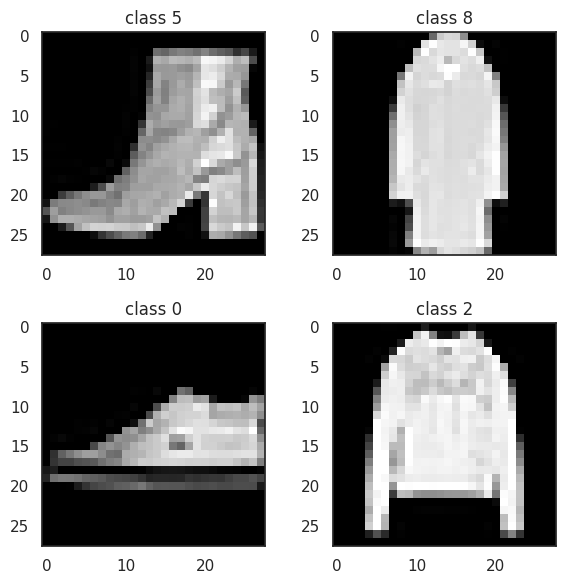

In [21]:
visualize(X_train2, y_train2)

**CIFAR10** is a collection of 50,000 32x32 color training images labeled over 10 different categories, along with a test set of 10,000 images.


In [19]:
(X_train3, y_train3), (X_test3, y_train3) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 61s 0us/step


X_train is a uint8 numpy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train is a uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.


In [20]:
print(X_train3.shape)
print(X_train3.dtype)

(50000, 32, 32, 3)
uint8


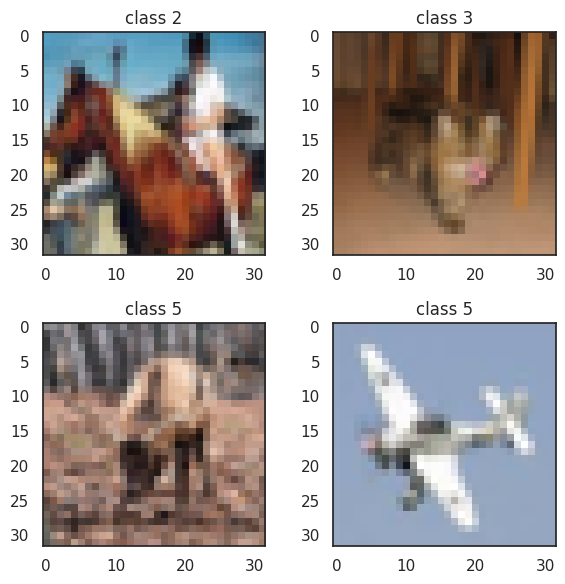

In [22]:
visualize(X_train3, y_train3)

**CIFAR100** is a collection of 50,000 32x32 color training images labeled over 100 fine-grained classes and 20 coarse-grained classes, along with a test set of 10,000 images. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (label) and a "coarse" label (superclass).


Using the fine `label_mode`:


In [23]:
(X_train4, y_train4), (X_test4, y_test4) = keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 52s 0us/step


In [24]:
print(X_train4.shape)
print(X_train4.dtype)

(50000, 32, 32, 3)
uint8


In [27]:
visualize(X_train4, y_train4)

Error in callback <function _draw_all_if_interactive at 0x7f9a8cc33880> (for post_execute), with arguments args (),kwargs {}:


ValueError: arrays must be of dtype byte, short, float32 or float64

ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 600x600 with 4 Axes>

### Exercise 2 - Load CIFAR100 with coarse label_mode


Load the CIFAR100 dataset by setting the pramter ```label_mode = 'coarse'``` in the ```load_data``` function .


In [26]:
(X_train5, y_train5), (X_test5, y_train5) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')